# **Деревья решений и случайный лес. Практика**

✍ Настало время попрактиковаться в использовании деревьев решений и случайного леса для решения задачи классификации.

Продолжим решение задачи об оттоке клиентов банка, которую мы решали в юните 4. Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

→ Теперь попробуем решить задачу с помощью деревьев решений и лесов.

Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.

Поэтому для решения задачи используйте обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки без полиномиальных столбцов.

In [3]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

# модели деревьев решений
from sklearn import tree 

# импорт модуля для ансамблей
from sklearn import ensemble

# прочитаем нашу таблицу:
churn_data = pd.read_csv('data/churn.csv')

# Берём только немецкий филиал
churn_data = churn_data[churn_data['Geography'] == 'Germany']

# Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

# добавляем новые признаки
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

# Также перекодируем единственный текстовый категориальный признак
# Gender в бинарный столбец (1 — 'Male', 0 — 'Female'):
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

# Разделим набор данных на матрицу наблюдений X и столбец ответов y:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

# И, наконец, заранее позаботимся о масштабах признаков.
# Проведём нормализацию матрицы наблюдений X:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Выполним разбиение, установив значением параметра random_state число 0:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

***
## **ЗАДАЧИ**

Обучите на обучающей выборке дерево решений с **максимальной глубиной 8**. В качестве **критерия информативности** используйте **энтропию Шеннона**. **Минимальное число объектов** в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — **10**.

В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для **тренировочной** и **тестовой** выборок.

Чему равно значение **целевой метрики (F1)** на каждой из выборок? Ответ округлите до двух знаков после точки-разделителя.

In [8]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса для train
y_pred = dt_clf_full.predict(X_train)
#Выводим отчёт о метриках
print(metrics.f1_score(y_train, y_pred).round(2))

#Делаем предсказание класса для test
y_pred = dt_clf_full.predict(X_test)
#Выводим отчёт о метриках
print(metrics.f1_score(y_test, y_pred).round(2))

0.72
0.64


Постройте случайный лес из **500 деревьев** с **максимальной глубиной 8**. Критерий информативности — **энтропия Шеннона**. **Минимальное число объектов в листе** (количество объектов, при которых дерево прекратит делиться и образуется лист) — **10**.

В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для тренировочной и тестовой выборок.

Чему равно **значение целевой метрики** на **каждой из выборок**? Ответ округлите до двух знаков после точки-разделителя.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?

In [10]:
#Создаём объект класса RandomForestClassifier
churn_forest = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10,
    #max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)


#Обучаем модель
churn_forest.fit(X_train, y_train)


#Делаем предсказание класса train
y_pred_train = churn_forest.predict(X_train)
#Выводим отчёт о метриках
print(metrics.f1_score(y_train, y_pred_train).round(2))

#Делаем предсказание класса test
y_pred_test = churn_forest.predict(X_test)
#Выводим отчёт о метриках
print(metrics.f1_score(y_test, y_pred_test).round(2))

0.74
0.66


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте модель, которая показала наилучшее качество.

В качестве порога вероятности используйте значения из следующего диапазона:

thresholds = np.arange(0.1, 1, 0.05)
Напомним, как определить оптимальный порог вероятности:

1. Предсказать вероятности оттока для каждого клиента из тестовой выборки.
2. В цикле перебирать значения порогов вероятности threshold.
    2.1 Сделать предсказание класса по принципу: если вероятность  threshold, отнести объект к классу 1, в противном случае — к классу 0.
    2.2 Рассчитать метрику и занести её в заранее созданный список.

Постройте график зависимости целевой метрики от порога вероятности.

Какому порогу вероятности соответствует наибольшее значение целевой метрики? Ответ округлите до двух знаков после точки-разделителя.

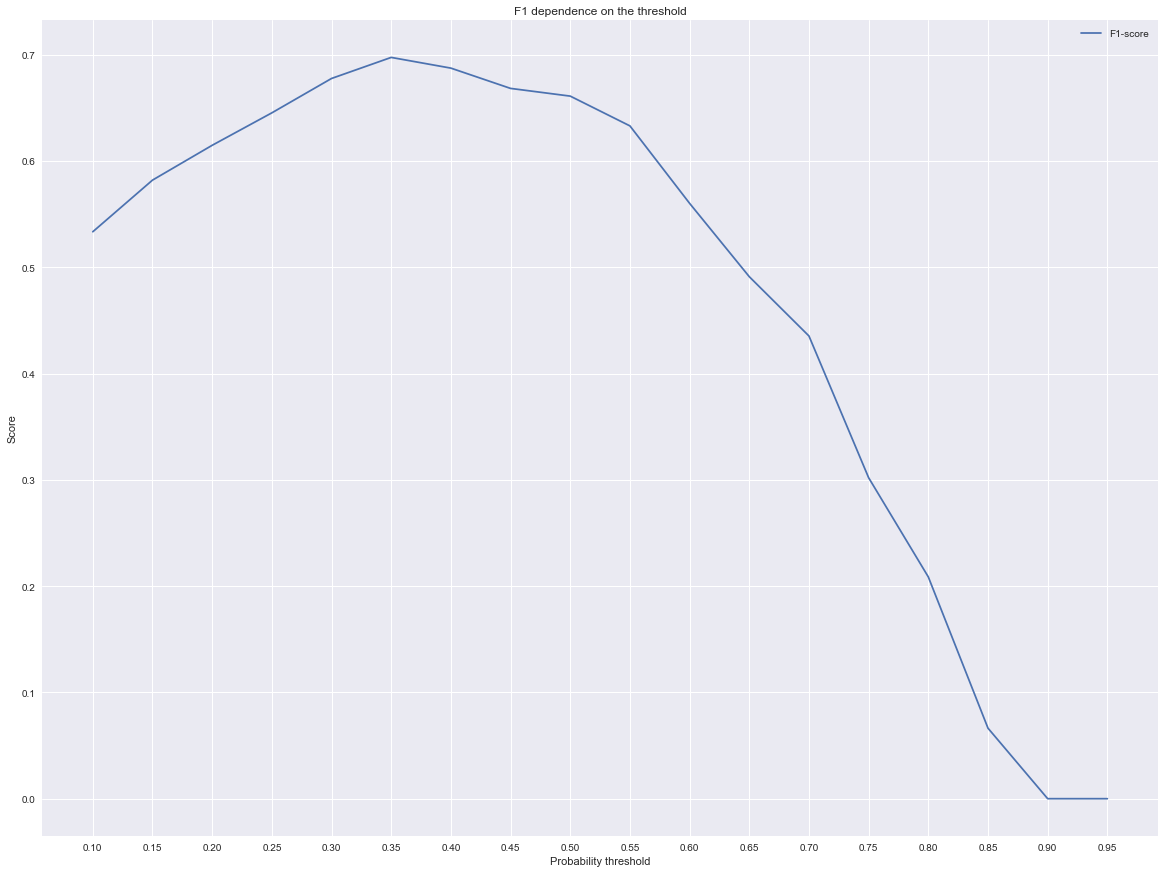

In [11]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_test = churn_forest.predict_proba(X_test)[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_test = pd.Series(y_proba_test)

#Создадим списки, в которых будем хранить значения метрик 
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    y_pred = y_proba_test.apply(lambda x: 1 if x>threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_pred))


#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(20, 15)) #фигура + координатная плоскость
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')

#Даём графику название и подписываем оси
ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

Сделайте предсказание на тестовой выборке с подобранным порогом вероятности. Используйте модель, показавшую наилучшее качество.

Чему равно значение целевой метрики на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [12]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35
y_pred_opt = y_proba_test.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.f1_score(y_test, y_pred_opt).round(2))

0.7
